### Notes
* https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
* http://scikit-learn.org/stable/modules/manifold.html#t-sne
* http://jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf
* https://www.kaggle.com/thykhuely/mercari-interactive-eda-topic-modelling
* https://www.dataquest.io/blog/build-a-data-science-portfolio/
* https://www.youtube.com/watch?v=NEaUSP4YerM
* http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
* https://www.stat.berkeley.edu/~spector/s133/Clus.html
* https://stats.stackexchange.com/questions/10540/how-to-interpret-mean-of-silhouette-plot
* Visualize clusters with and without tSNE
* Need to understand how to explain the variance of costs within the clusters
* Need to plot silhouette charts

In [1]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import seaborn as sns
from nltk import word_tokenize
from collections import Counter
from wordcloud import WordCloud
from string import punctuation
from sklearn.decomposition import PCA
import re
%matplotlib inline

In [2]:
file = 'http://bit.ly/aqmd-violations-final'
titlev = 'http://bit.ly/aqmd-titlev'
reclaim = 'http://bit.ly/aqmd-reclaim'

In [3]:
df_all = pd.read_csv(file)
df_titleV = pd.read_csv(titlev)
df_reclaim = pd.read_csv(reclaim)

In [4]:
df_all.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN


In [5]:
df_all['facility_type'] = ''

In [6]:
df_all.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,


In [7]:
df_titleV.head()

,Facility ID,Facility Name,City,County,Initial Issue Date,Renewal Date
0,35188,3M COMPANY,MONROVIA,LA,6/17/13,NaN
1,800088,3M COMPANY,CORONA,RV,5/9/00,5/4/12
2,45489,"ABBOTT CARDIOVASCULAR SYSTEMS, INC.",TEMECULA,RV,10/26/01,1/11/12
3,47084,ADVANCE PAPER BOX CO,LOS ANGELES,LA,8/13/01,9/16/11
4,57390,ADVANCE TRUCK PAINTING INC,PICO RIVERA,LA,4/16/01,6/7/11


In [8]:
df_reclaim.head()

,Fac_id
0,136
1,346
2,550
3,1073
4,1744


In [9]:
reclaim_list = df_reclaim['Fac_id'].tolist()

In [10]:
titlev_list = df_titleV['Facility ID'].tolist()

In [11]:
reclaim_titlev_list = [facility for facility in titlev_list if facility in reclaim_list]

In [12]:
list_error = []
for index, row in df_all.iterrows():
    try:
        pd.to_numeric(row['facility id'])
    except:
        list_error.append(row)
list_error

[facility id                                                  16, 20
 notification                                                 P57290
 Attorney                                                        WBW
 Total                                                         40000
 url               http://www3.aqmd.gov/webappl/fim/prog/novdetai...
 violation_data    failure to conduct NOx emissions checks monthl...
 equipment                                                       NaN
 facility_type                                                      
 Name: 475, dtype: object,
 facility id                                                  16, 20
 notification                                                 P57290
 Attorney                                                        FAC
 Total                                                         40000
 url               http://www3.aqmd.gov/webappl/fim/prog/novdetai...
 violation_data    failure to conduct NOx emissions checks monthl...
 equipm

In [13]:
for each in list_error:
    print(each['facility id'])

16, 20
16, 20
16, 20
2344 2
202, 2
31, 20
31, 20
10/1
10/1
10/1


In [14]:
for each in list_error:
    print(each['notification'])

P57290
P57290
P57290
P63673
HRB2169
SRV97
SRV97
HRB2187
HRB2191
HRB2191


In [15]:
df_all.iloc[475]['facility id']
df_all.set_value(475, 'facility id', '50134')

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,
5,115862,P59039,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO CONDUCT REVERIFICATION TEST 6 MONTH...,NaN,
6,115862,P61478,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failure to post permit on site. Failure to pro...,to repair/replace vapor recovery components wi...,
7,115862,P61475,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating a gasoline dispensing facility contr...,NaN,
8,800057,P52622,BTG,3000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,"TWO VAPOR RECOVERY HOSES LEAKING ABOVE 3,000 P...",NaN,
9,84456,P61702,NSF,2500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating an AJAX boiler rated at 4.25 million...,AJAX boiler rated at 4.25 million btu/hr,


In [16]:
df_all.iloc[476]
df_all.set_value(476, 'facility id', '50134')

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,
5,115862,P59039,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO CONDUCT REVERIFICATION TEST 6 MONTH...,NaN,
6,115862,P61478,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failure to post permit on site. Failure to pro...,to repair/replace vapor recovery components wi...,
7,115862,P61475,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating a gasoline dispensing facility contr...,NaN,
8,800057,P52622,BTG,3000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,"TWO VAPOR RECOVERY HOSES LEAKING ABOVE 3,000 P...",NaN,
9,84456,P61702,NSF,2500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating an AJAX boiler rated at 4.25 million...,AJAX boiler rated at 4.25 million btu/hr,


In [17]:
df_all.iloc[477]
df_all.set_value(477, 'facility id', '50134')

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,
5,115862,P59039,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO CONDUCT REVERIFICATION TEST 6 MONTH...,NaN,
6,115862,P61478,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failure to post permit on site. Failure to pro...,to repair/replace vapor recovery components wi...,
7,115862,P61475,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating a gasoline dispensing facility contr...,NaN,
8,800057,P52622,BTG,3000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,"TWO VAPOR RECOVERY HOSES LEAKING ABOVE 3,000 P...",NaN,
9,84456,P61702,NSF,2500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating an AJAX boiler rated at 4.25 million...,AJAX boiler rated at 4.25 million btu/hr,


In [18]:
df_all.iloc[1284]
df_all.set_value(1284, 'facility id', '2344')

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,
5,115862,P59039,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO CONDUCT REVERIFICATION TEST 6 MONTH...,NaN,
6,115862,P61478,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failure to post permit on site. Failure to pro...,to repair/replace vapor recovery components wi...,
7,115862,P61475,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating a gasoline dispensing facility contr...,NaN,
8,800057,P52622,BTG,3000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,"TWO VAPOR RECOVERY HOSES LEAKING ABOVE 3,000 P...",NaN,
9,84456,P61702,NSF,2500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating an AJAX boiler rated at 4.25 million...,AJAX boiler rated at 4.25 million btu/hr,


In [19]:
list_error = []
for index, row in df_all.iterrows():
    try:
        pd.to_numeric(row['facility id'])
    except:
        list_error.append(row)
list_error

[facility id                                                  202, 2
 notification                                                HRB2169
 Attorney                                                        INT
 Total                                                          1000
 url               http://www3.aqmd.gov/webappl/fim/prog/novdetai...
 violation_data                                                  NaN
 equipment                                                       NaN
 facility_type                                                      
 Name: 1695, dtype: object,
 facility id                                                  31, 20
 notification                                                  SRV97
 Attorney                                                        WBW
 Total                                                        213376
 url               http://www3.aqmd.gov/webappl/fim/prog/novdetai...
 violation_data                                                  NaN
 equip

In [20]:
for each in list_error:
    print(each['facility id'])

202, 2
31, 20
31, 20
10/1
10/1
10/1


In [21]:
for each in list_error:
    print(each['notification'])

HRB2169
SRV97
SRV97
HRB2187
HRB2191
HRB2191


In [22]:
df_all.drop(df_all.index[1695])

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,
5,115862,P59039,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO CONDUCT REVERIFICATION TEST 6 MONTH...,NaN,
6,115862,P61478,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failure to post permit on site. Failure to pro...,to repair/replace vapor recovery components wi...,
7,115862,P61475,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating a gasoline dispensing facility contr...,NaN,
8,800057,P52622,BTG,3000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,"TWO VAPOR RECOVERY HOSES LEAKING ABOVE 3,000 P...",NaN,
9,84456,P61702,NSF,2500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating an AJAX boiler rated at 4.25 million...,AJAX boiler rated at 4.25 million btu/hr,


In [23]:
list_error = []
for index, row in df_all.iterrows():
    try:
        pd.to_numeric(row['facility id'])
    except:
        list_error.append(row)
        print(index)

1695
2066
2067
3138
3140
3141


In [24]:
df_all = df_all.drop(df_all.index[[1695,
2066,
2067,
3138,
3140,
3141]])

In [25]:
list_error = []
for index, row in df_all.iterrows():
    try:
        pd.to_numeric(row['facility id'])
    except:
        list_error.append(row)
        print(index)

In [26]:
df_all.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,


In [27]:
index_row = []
for index, row in df_all.iterrows():
    try:
        if float(row['facility id']) in titlev_list:
            df_all.set_value(index, 'facility_type', 't')
        elif float(row['facility id']) in reclaim_list:
            df_all.set_value(index, 'facility_type', 'r')
        else:
            df_all.set_value(index, 'facility_type', 'n')
    except:
        index_row.append(row)
index_row

[]

In [28]:
index_row = []
for index, row in df_all.iterrows():
    try:
        if float(row['facility id']) in reclaim_titlev_list:
            df_all.set_value(index, 'facility_type', 'rt')
    except:
        index_row.append(row)
index_row

[]

In [29]:
df_all.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,rt
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,rt
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,t
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,t
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,n


In [30]:
df_all.shape

(3682, 8)

In [31]:
df_rt = df_all[(df_all['facility_type'] == 'rt')]
df_rt.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type
0,3704,P56324,KCM,7200.0,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,rt
1,3704,P56323,KCM,7200.0,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,rt
19,11034,P55543,TRB,1000.0,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,The electronic report of daily mass emissions ...,NaN,rt
20,800026,SRV105,KCM,71200.0,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,NaN,NaN,rt
69,800408,P59376,TRB,1000.0,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating Device #C160 contrary to permit cond...,NaN,rt


In [32]:
df_facility_average = df_all.groupby(['facility_type'], as_index=False).mean()
df_facility_average

,facility_type,Total
0,n,11762.097454
1,r,38479.358108
2,rt,523801.033898
3,t,446882.295084


In [33]:
punctuation_symbols = []
for each in list(punctuation):
    punctuation_symbols.append((each))

In [34]:
set(df_all['facility_type'].tolist())

{'n', 'r', 'rt', 't'}

In [35]:
len(df_all['facility_type'].tolist())

3682

In [36]:
df_all = df_all.dropna(subset=['violation_data'])
df_all.shape

(3336, 8)

In [37]:
def remove_puncuation(d):
    for each in punctuation_symbols:
        d = d.replace(each, '')
    return d

In [38]:
def remove_digits(x):
    x = ''.join([i for i in x if not i.isdigit()])
    return x

In [39]:
df_all['violation_data'] = df_all.violation_data.apply(remove_digits)
df_all['violation_data'] = df_all.violation_data.apply(remove_puncuation)
df_all['violation_data'] = df_all['violation_data'].str.lower()

In [40]:
df_all.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failed to reconcile quarterly nox emissions in...,NOX RECLAIM facility,rt
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,inaccurate qcers inaccurate apep,NOx RECLAIM facility,rt
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failure to keep the roof of internal floating ...,NaN,t
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failure to operate and maintain a continuous m...,NaN,t
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,selling architectural coatings within the scaq...,NaN,n


In [41]:
df_all['trim_violation_text'] = ''
for index, row in df_all.iterrows():
    df_all.set_value(index, 'trim_violation_text', re.sub(r' +', ' ', str(row['violation_data'])))
df_all.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type,trim_violation_text
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failed to reconcile quarterly nox emissions in...,NOX RECLAIM facility,rt,failed to reconcile quarterly nox emissions in...
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,inaccurate qcers inaccurate apep,NOx RECLAIM facility,rt,inaccurate qcers inaccurate apep
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failure to keep the roof of internal floating ...,NaN,t,failure to keep the roof of internal floating ...
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failure to operate and maintain a continuous m...,NaN,t,failure to operate and maintain a continuous m...
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,selling architectural coatings within the scaq...,NaN,n,selling architectural coatings within the scaq...


In [42]:
df_all['violation_data'].isnull().sum()

0

In [43]:
facility_type_ = dict()
type_list = ['rt', 't', 'r', 'n']
for each in type_list:
    text = ' '.join(df_all.loc[df_all['facility_type'] == each, 'trim_violation_text'].values)
    facility_type_[each] = word_tokenize(text)

In [44]:
none_top100 = Counter(facility_type_['n']).most_common(100)
reclaim_top100 = Counter(facility_type_['r']).most_common(100)
titlev_top100 = Counter(facility_type_['t']).most_common(100)
reclaim_titlev_top100 = Counter(facility_type_['rt']).most_common(100)

In [45]:
def create_wordcloud(d):
    wordcloud = WordCloud(background_color='white',
                          max_words=75, 
                          max_font_size=40,
                          random_state=42).generate(str(d))
    return wordcloud

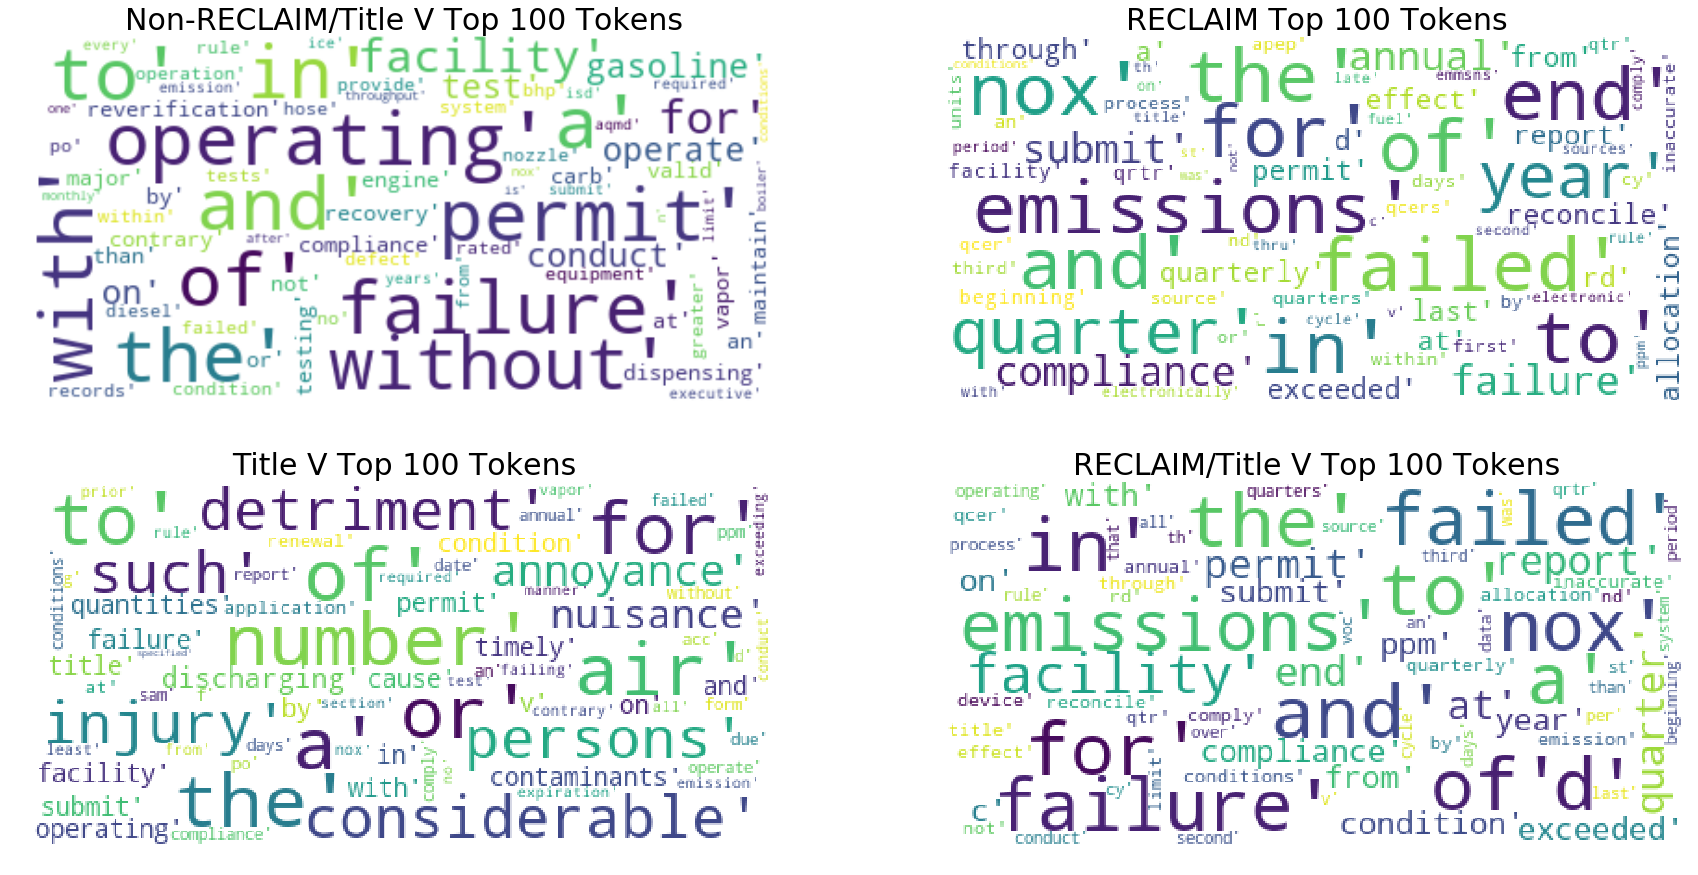

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(30, 15))

ax = axes[0, 0]
ax.imshow(create_wordcloud(none_top100), interpolation="bilinear")
ax.axis('off')
ax.set_title("Non-RECLAIM/Title V Top 100 Tokens", fontsize=30)

ax = axes[0, 1]
ax.imshow(create_wordcloud(reclaim_top100))
ax.axis('off')
ax.set_title("RECLAIM Top 100 Tokens", fontsize=30)

ax = axes[1, 0]
ax.imshow(create_wordcloud(titlev_top100))
ax.axis('off')
ax.set_title("Title V Top 100 Tokens", fontsize=30)

ax = axes[1, 1]
ax.imshow(create_wordcloud(reclaim_titlev_top100))
ax.axis('off')
ax.set_title("RECLAIM/Title V Top 100 Tokens", fontsize=30)
plt.show()

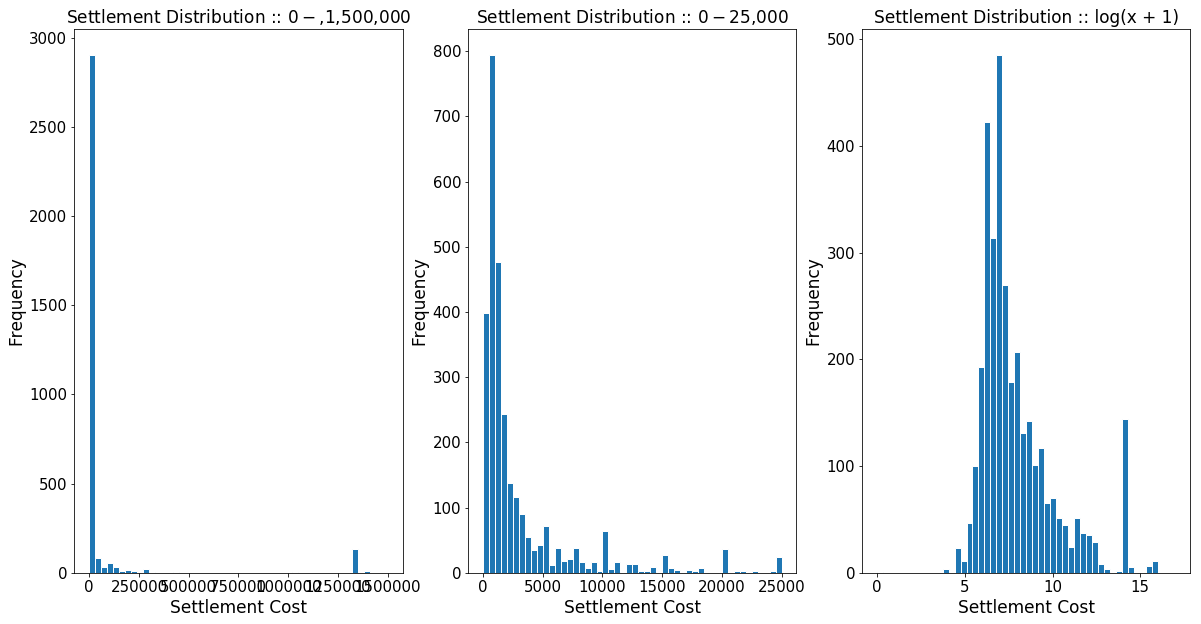

In [47]:
plt.subplot(1, 3, 1)
(df_all['Total']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,1500000])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: $0-$,1,500,000', fontsize=17)

plt.subplot(1, 3, 2)
(df_all['Total']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,25000])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: $0-$25,000', fontsize=17)

plt.subplot(1, 3, 3)
(np.log(df_all['Total'] + 1)).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,17])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: log(x + 1)', fontsize=17)
plt.show()

#https://www.quora.com/What-are-the-downsides-when-using-log-x-+-1-as-ones-log-transformation
#http://onbiostatistics.blogspot.com/2012/05/logx1-data-transformation.html

In [48]:
facility_count = df_all[['Total','facility_type']].groupby(['facility_type'], as_index =False).count()
facility_count

,facility_type,Total
0,n,2552
1,r,142
2,rt,282
3,t,360


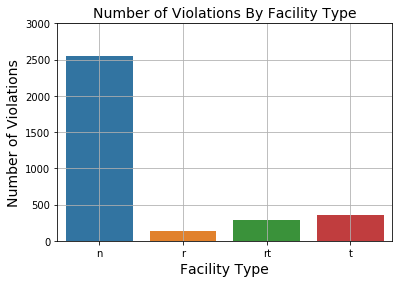

In [49]:
sns.barplot(facility_count['facility_type'], facility_count['Total'])
plt.grid(True)
plt.ylim(0, 3000, 100)
plt.xlabel('Facility Type', fontsize = 14)
plt.ylabel('Number of Violations', fontsize = 14)
plt.title('Number of Violations By Facility Type', fontsize = 14)
plt.show()

In [50]:
df_none = df_all[df_all['facility_type'] == 'n'].reset_index(drop=True)
df_rt = df_all[df_all['facility_type'] == 'rt'].reset_index(drop=True)
df_r = df_all[df_all['facility_type'] == 'r'].reset_index(drop=True)
df_t = df_all[df_all['facility_type'] == 't'].reset_index(drop=True)

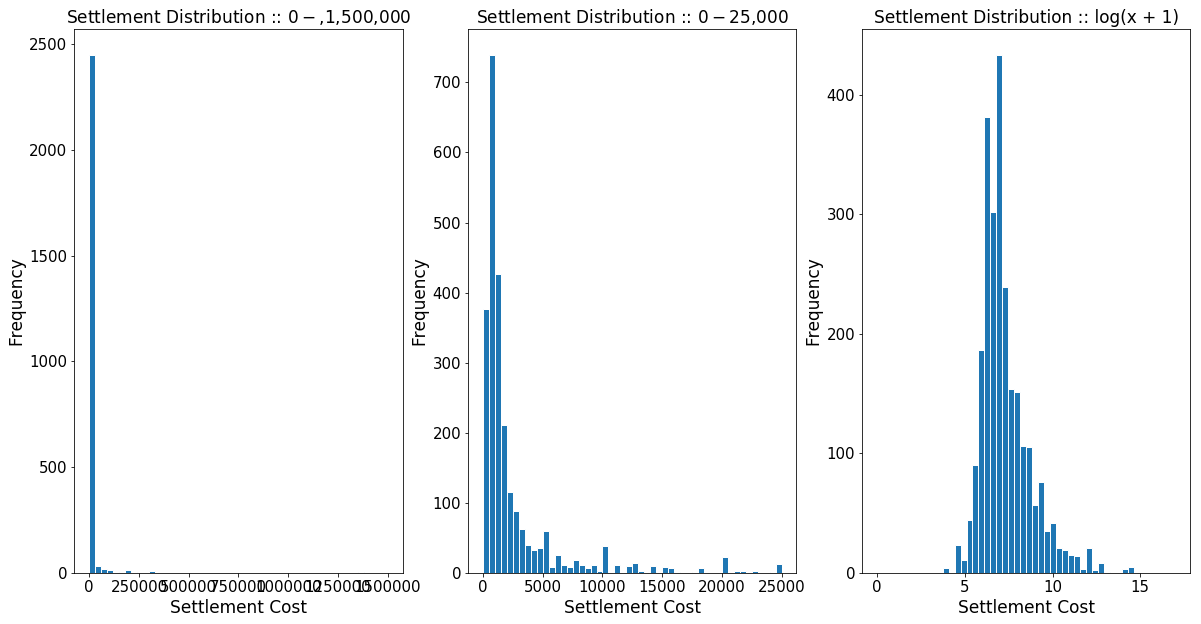

In [51]:
plt.subplot(1, 3, 1)
(df_none['Total']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,1500000])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: $0-$,1,500,000', fontsize=17)

plt.subplot(1, 3, 2)
(df_none['Total']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,25000])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: $0-$25,000', fontsize=17)

plt.subplot(1, 3, 3)
(np.log(df_none['Total'] + 1)).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,17])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: log(x + 1)', fontsize=17)
plt.show()

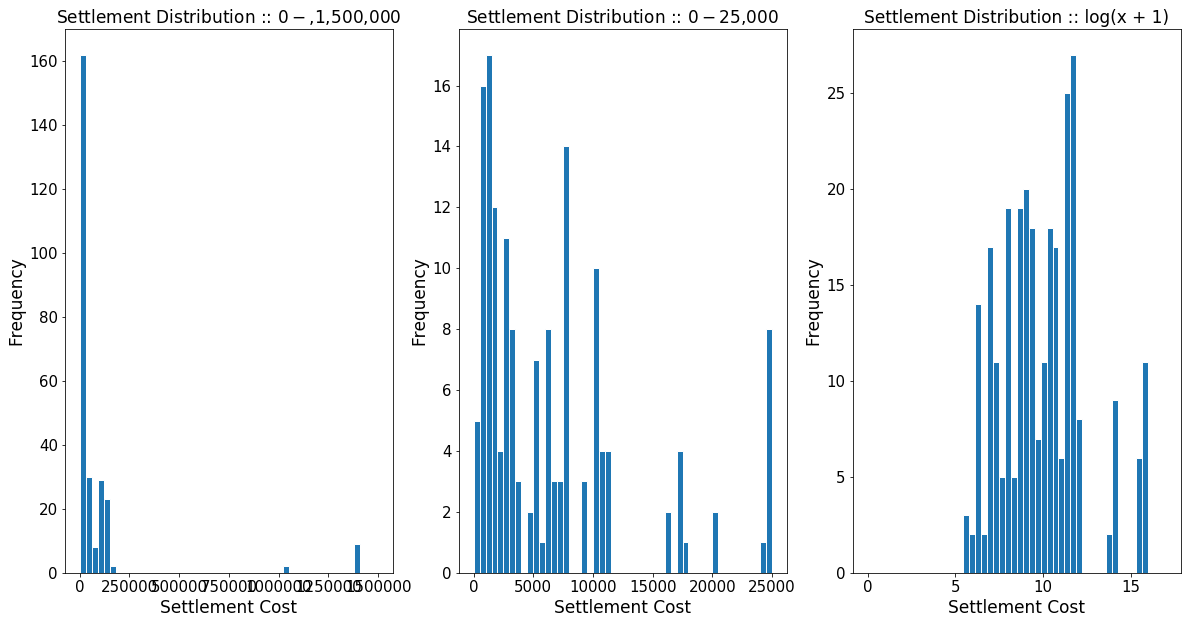

In [52]:
plt.subplot(1, 3, 1)
(df_rt['Total']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,1500000])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: $0-$,1,500,000', fontsize=17)

plt.subplot(1, 3, 2)
(df_rt['Total']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,25000])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: $0-$25,000', fontsize=17)

plt.subplot(1, 3, 3)
(np.log(df_rt['Total'] + 1)).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,17])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: log(x + 1)', fontsize=17)
plt.show()

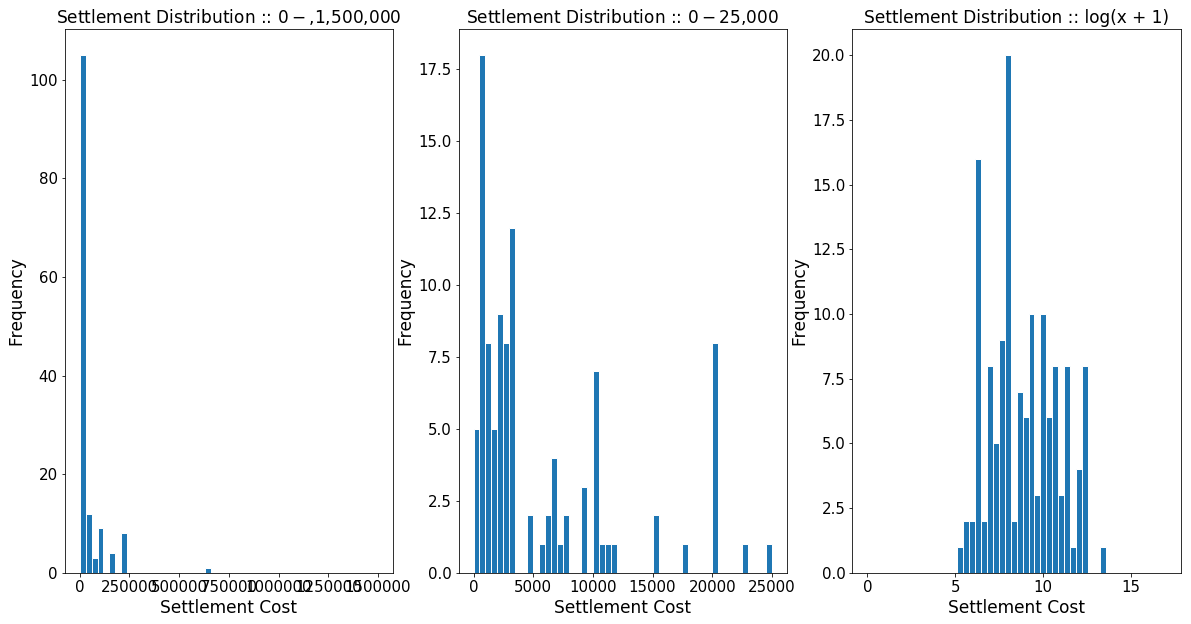

In [53]:
plt.subplot(1, 3, 1)
(df_r['Total']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,1500000])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: $0-$,1,500,000', fontsize=17)

plt.subplot(1, 3, 2)
(df_r['Total']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,25000])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: $0-$25,000', fontsize=17)

plt.subplot(1, 3, 3)
(np.log(df_r['Total'] + 1)).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,17])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: log(x + 1)', fontsize=17)
plt.show()

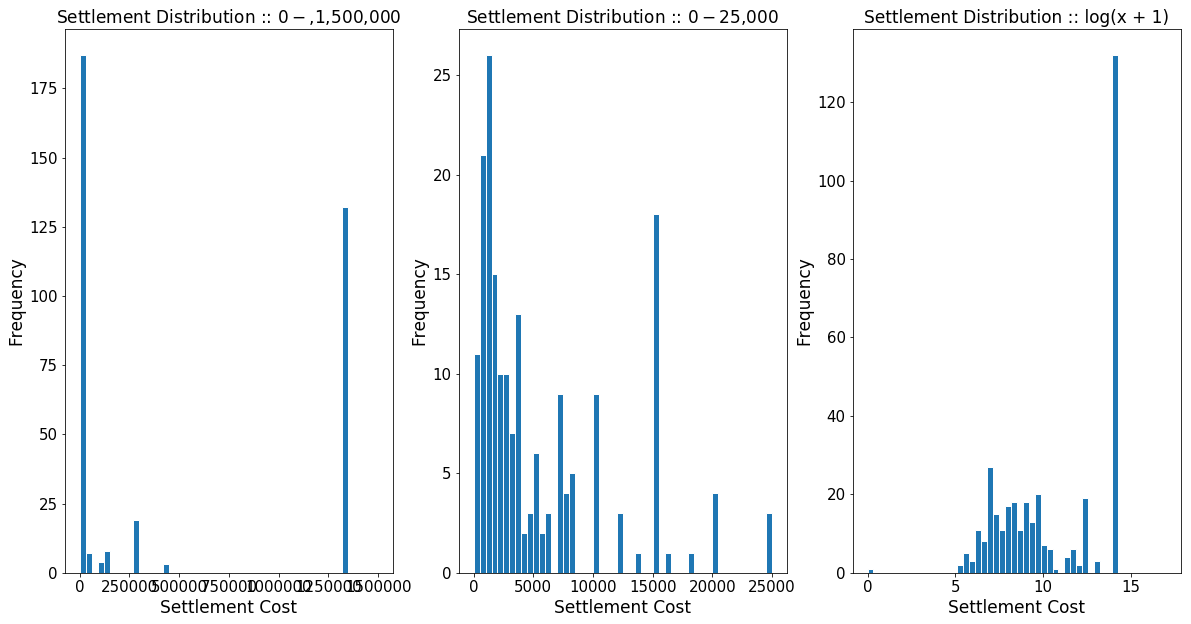

In [54]:
plt.subplot(1, 3, 1)
(df_t['Total']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,1500000])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: $0-$,1,500,000', fontsize=17)

plt.subplot(1, 3, 2)
(df_t['Total']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,25000])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: $0-$25,000', fontsize=17)

plt.subplot(1, 3, 3)
(np.log(df_t['Total'] + 1)).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,17])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: log(x + 1)', fontsize=17)
plt.show()

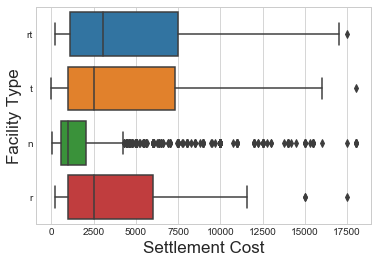

In [55]:
sns.set_style('whitegrid')
data = df_all[df_all['Total'] < 20000]
ax = sns.boxplot(x="Total", y="facility_type", data=data)
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Facility Type', fontsize=17)
plt.show()

In [56]:
min_df = 0.01
max_df = 0.90
vect = CountVectorizer(stop_words='english', min_df=min_df, max_df=max_df, ngram_range=(3,4))

In [57]:
X = df_all['violation_data']
y = df_all['facility_type']

In [58]:
df_all.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type,trim_violation_text
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failed to reconcile quarterly nox emissions in...,NOX RECLAIM facility,rt,failed to reconcile quarterly nox emissions in...
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,inaccurate qcers inaccurate apep,NOx RECLAIM facility,rt,inaccurate qcers inaccurate apep
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failure to keep the roof of internal floating ...,NaN,t,failure to keep the roof of internal floating ...
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failure to operate and maintain a continuous m...,NaN,t,failure to operate and maintain a continuous m...
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,selling architectural coatings within the scaq...,NaN,n,selling architectural coatings within the scaq...


In [59]:
def determine_length(d):
    d = d.split(' ')
    return len(d)

In [60]:
df_all['violation_length'] = df_all['trim_violation_text'].apply(determine_length)

In [61]:
df_all.iloc[1]['trim_violation_text'].split(' ')

['inaccurate', 'qcers', 'inaccurate', 'apep']

In [62]:
df_all.iloc[1]['violation_length']

4

In [63]:
df_all.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type,trim_violation_text,violation_length
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failed to reconcile quarterly nox emissions in...,NOX RECLAIM facility,rt,failed to reconcile quarterly nox emissions in...,42
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,inaccurate qcers inaccurate apep,NOx RECLAIM facility,rt,inaccurate qcers inaccurate apep,4
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failure to keep the roof of internal floating ...,NaN,t,failure to keep the roof of internal floating ...,22
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failure to operate and maintain a continuous m...,NaN,t,failure to operate and maintain a continuous m...,14
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,selling architectural coatings within the scaq...,NaN,n,selling architectural coatings within the scaq...,25


In [64]:
df_len_cost = df_all[['Total', 'violation_length']].groupby(['violation_length'], as_index=False).mean()
df_len_cost.head()

,violation_length,Total
0,1,5187.500000
1,2,765327.272727
2,3,35393.750000
3,4,31681.250000
4,5,121657.500000


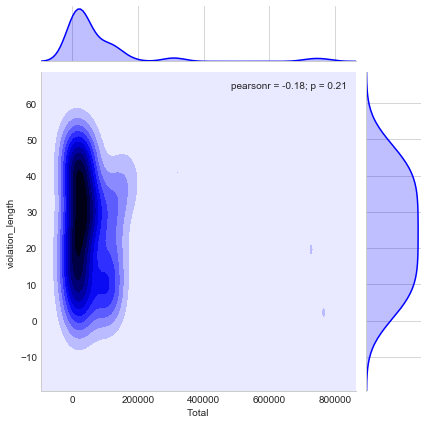

In [65]:
plt.figure(figsize = (10, 10))
sns.jointplot(x=df_len_cost["Total"], y=df_len_cost["violation_length"], kind='kde', color = 'b')
plt.show()

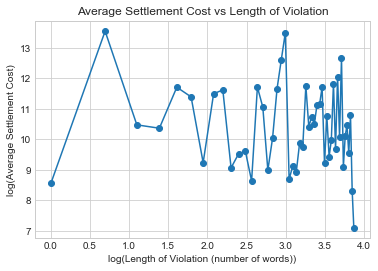

In [66]:
x = np.log(df_len_cost['violation_length'])
y = np.log(df_len_cost['Total'])
plt.scatter(x, y)
plt.plot(x, y)
plt.ylabel('log(Average Settlement Cost)')
plt.xlabel('log(Length of Violation (number of words))')
plt.title('Average Settlement Cost vs Length of Violation')
plt.show()

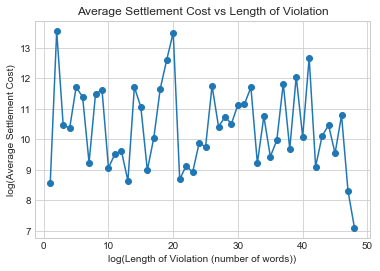

In [67]:
x = (df_len_cost['violation_length'])
y = np.log(df_len_cost['Total'])
plt.scatter(x, y)
plt.plot(x, y)
plt.ylabel('log(Average Settlement Cost)')
plt.xlabel('log(Length of Violation (number of words))')
plt.title('Average Settlement Cost vs Length of Violation')
plt.show()

This is a PCA of the initial dataset using `n_components = 2`

In [68]:
min_df = 0.01
max_df = 0.90
vect = CountVectorizer(stop_words='english', min_df=min_df, max_df=max_df, ngram_range=(3,4))
X_dtm = vect.fit_transform(X)
pca = PCA(n_components = 2)
pca_results = pca.fit_transform(X_dtm.toarray())
print('Size of Feature Vector is: ', len(X_dtm.toarray()[0]))

Size of Feature Vector is:  98


In [69]:
pca.explained_variance_ratio_

array([ 0.32350814,  0.16010864])

In [70]:
print('Total Variance', (pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]) * 100, '%')

Total Variance 48.3616776575 %


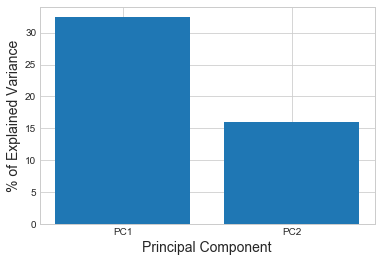

In [71]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.bar(x = range(1, len(per_var)+1), height=per_var, tick_label = labels)
plt.xlabel('Principal Component', fontsize = 14)
plt.ylabel('% of Explained Variance', fontsize = 14)
plt.show()

In [126]:
pca_df = pd.DataFrame(pca_results, columns=['x', 'y'])
pca_df['violation_text'] = df_all['violation_data']
pca_df['facility_type'] = df_all['facility_type']
pca_df['Total_Settlement'] = df_all['Total']

In [127]:
pca_df.head()

,x,y,violation_text,facility_type,Total_Settlement
0,-0.211480,-0.394044,failed to reconcile quarterly nox emissions in...,rt,7200.00
1,-0.173292,-0.238447,inaccurate qcers inaccurate apep,rt,7200.00
2,-0.173292,-0.238447,failure to keep the roof of internal floating ...,t,3500.00
3,-0.173292,-0.238447,failure to operate and maintain a continuous m...,t,3500.00
4,-0.173292,-0.238447,selling architectural coatings within the scaq...,n,9438.66


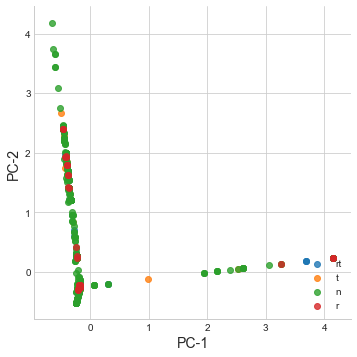

In [128]:
sns.lmplot( x="x", y="y", data=pca_df, fit_reg=False, hue='facility_type', legend=False)
plt.legend(loc='lower right')
plt.xlabel('PC-1', fontsize = 14)
plt.ylabel('PC-2', fontsize = 14)
plt.show()

In [149]:
pc1_df = pca_df[(pca_df['x'] > 1) & (pca_df['y'] < 1)].reset_index(drop=True)
print(pc1_df.loc[159]['violation_text'])
print('---')
print(pc1_df.loc[100]['violation_text'])

operating a caterpillar  serial number pg rated above  hp without a permit to operate
---
for discharging such quantities of air contaminants to cause injury detriment nuisance or annoyance to a considerable number of persons


This is a tSNE of the initial dataset using `learning_rate=100` and `perplexity=40`

In [75]:
X = df_all['violation_data']
y = df_all['facility_type']
min_df = 0.01
max_df = 0.90
vect = CountVectorizer(stop_words='english', min_df=min_df, max_df=max_df, ngram_range=(3,4))
X_dtm = vect.fit_transform(X)

In [76]:
start = time.time()

model = TSNE(learning_rate=100, perplexity=40)
transformed = model.fit_transform(X_dtm.toarray())

end = time.time()
print('Elapsed time: ', end - start, 'seconds')

Elapsed time:  93.37831592559814 seconds


In [77]:
tsne_df = pd.DataFrame(transformed, columns=['x', 'y'])
tsne_df['violation_text'] = df_all['trim_violation_text']
tsne_df['facility_type'] = df_all['facility_type']
tsne_df['Total_Settlement'] = df_all['Total']
tsne_df.head()

,x,y,violation_text,facility_type,Total_Settlement
0,-22.662731,12.992032,failed to reconcile quarterly nox emissions in...,rt,7200.00
1,1.644025,-0.598189,inaccurate qcers inaccurate apep,rt,7200.00
2,2.561298,-2.261492,failure to keep the roof of internal floating ...,t,3500.00
3,1.779079,-1.683089,failure to operate and maintain a continuous m...,t,3500.00
4,2.731908,1.185044,selling architectural coatings within the scaq...,n,9438.66


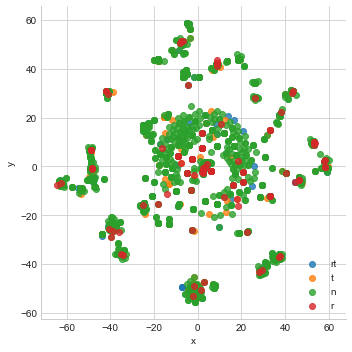

In [78]:
plt.figure(figsize=(20,10))
sns.lmplot( x="x", y="y", data=tsne_df, fit_reg=False, hue='facility_type', legend=False)
plt.legend(loc='lower right')
plt.show()

This is a SVD of the initial dataset using `n_components = 2`

In [79]:
X = df_all['violation_data']
y = df_all['facility_type']
min_df = 0.01
max_df = 0.90
vect = CountVectorizer(stop_words='english', min_df=min_df, max_df=max_df, ngram_range=(3,4))
X_dtm = vect.fit_transform(X)

In [80]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
svd_ctv = svd.fit_transform(X_dtm)

In [81]:
svd_df = pd.DataFrame(svd_ctv, columns=['x', 'y'])
svd_df['violation_text'] = df_all['trim_violation_text']
svd_df['facility_type'] = df_all['facility_type']
svd_df['Total_Settlement'] = df_all['Total']
svd_df.head()

,x,y,violation_text,facility_type,Total_Settlement
0,-1.923112e-08,8.185307e-07,failed to reconcile quarterly nox emissions in...,rt,7200.00
1,2.596289e-19,1.714475e-17,inaccurate qcers inaccurate apep,rt,7200.00
2,7.009089e-21,7.657218e-19,failure to keep the roof of internal floating ...,t,3500.00
3,1.494614e-20,-8.507350e-19,failure to operate and maintain a continuous m...,t,3500.00
4,6.339030e-22,-1.322072e-19,selling architectural coatings within the scaq...,n,9438.66


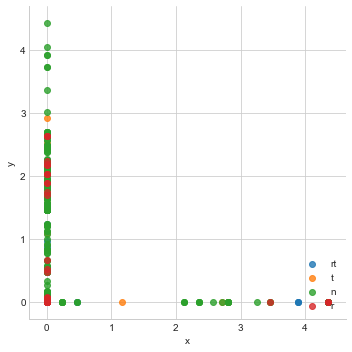

In [82]:
plt.figure(figsize=(20,10))
sns.lmplot( x="x", y="y", data=svd_df, fit_reg=False, hue='facility_type', legend=False)
plt.legend(loc='lower right')
plt.show()

## k-Means on the initial dataset

In [83]:
X = df_all['trim_violation_text']
y = df_all['facility_type']
min_df = 0.01
max_df = 0.90
vect = CountVectorizer(stop_words='english', min_df=min_df, max_df=max_df, ngram_range=(3,4))
X_dtm = vect.fit_transform(X)
print('Size of Feature Vector is: ', len(X_dtm.toarray()[0]))

Size of Feature Vector is:  98


In [84]:
start = time.time()

metric_ = []
silhouette_avg_ = []
for i in range(2, 25):
    kmeans = KMeans(n_clusters=i, random_state=10)
    kmeans.fit(X_dtm)
    metric_.append(kmeans.inertia_)
    labels = kmeans.predict(X_dtm)
    silhouette_avg = silhouette_score(X_dtm, labels)
    silhouette_avg_.append(silhouette_avg)

end = time.time()
print('Elapsed time: ', end - start, 'seconds')

Elapsed time:  16.62456703186035 seconds


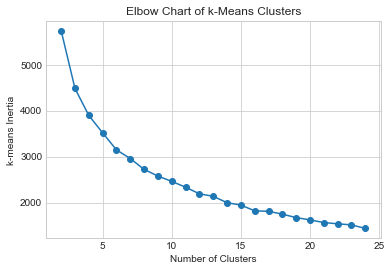

In [85]:
cluster = [x for x in range(2, 25)]
plt.scatter(cluster, metric_)
plt.plot(cluster, metric_)
plt.ylabel('k-means Inertia')
plt.xlabel('Number of Clusters')
plt.title('Elbow Chart of k-Means Clusters')
plt.show()

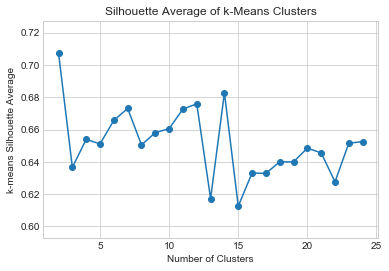

In [86]:
cluster = [x for x in range(2, 25)]
plt.scatter(cluster, silhouette_avg_)
plt.plot(cluster, silhouette_avg_)
plt.ylabel('k-means Silhouette Average')
plt.xlabel('Number of Clusters')
plt.title('Silhouette Average of k-Means Clusters')
plt.show()

In [87]:
silhouette_avg_

[0.70735448025767356,
 0.63656584787553794,
 0.65390424200296726,
 0.6510859604065462,
 0.66564172171420866,
 0.67306086625088102,
 0.65047513919888722,
 0.65802885357637597,
 0.6605519885232759,
 0.67270415517051974,
 0.67587547965489492,
 0.61723884898192216,
 0.68275336731151315,
 0.61255903652670829,
 0.63308160697815807,
 0.63281698821614363,
 0.64000256460168137,
 0.63994252619880632,
 0.64848175254241147,
 0.6455149639192661,
 0.62762006781954927,
 0.65155671635690648,
 0.65246865759865602]

In [88]:
silhouette_avg_[5]

0.67306086625088102

In [89]:
X_dtm = vect.fit_transform(X)
kmeans = KMeans(n_clusters=7, random_state=10)
kmeans.fit(X_dtm)
labels = kmeans.predict(X_dtm)
labels

array([5, 1, 1, ..., 1, 1, 1], dtype=int32)

In [90]:
kmeans_df = pd.DataFrame()
kmeans_df['violation_text'] = df_all['trim_violation_text']
kmeans_df['facility_type'] = df_all['facility_type']
kmeans_df['Total_Settlement'] = df_all['Total']
kmeans_df['Cluster'] = labels
kmeans_df.head(10)

,violation_text,facility_type,Total_Settlement,Cluster
0,failed to reconcile quarterly nox emissions in...,rt,7200.00,5
1,inaccurate qcers inaccurate apep,rt,7200.00,1
2,failure to keep the roof of internal floating ...,t,3500.00,1
3,failure to operate and maintain a continuous m...,t,3500.00,1
4,selling architectural coatings within the scaq...,n,9438.66,1
5,failure to conduct reverification test months ...,n,1000.00,1
6,failure to post permit on site failure to prov...,n,1000.00,1
7,operating a gasoline dispensing facility contr...,n,1000.00,3
8,two vapor recovery hoses leaking above ppm voc...,t,3000.00,1
9,operating an ajax boiler rated at million btuh...,n,2500.00,1


In [91]:
facility_type_ = dict()
type_list = range(0, 7)
for each in type_list:
    text = ' '.join(kmeans_df.loc[kmeans_df['Cluster'] == each, 'violation_text'].values)
    facility_type_[each] = word_tokenize(text)

In [177]:
Counter(facility_type_[0]).most_common(20)

[('a', 274),
 ('operating', 158),
 ('gasoline', 158),
 ('dispensing', 157),
 ('facility', 154),
 ('with', 154),
 ('major', 146),
 ('on', 115),
 ('to', 112),
 ('defect', 101),
 ('and', 87),
 ('failure', 55),
 ('hose', 54),
 ('pump', 52),
 ('down', 35),
 ('breakaway', 34),
 ('interlock', 34),
 ('in', 32),
 ('defects', 31),
 ('faulty', 30)]

In [176]:
Counter(facility_type_[1]).most_common(20)

[('to', 3334),
 ('the', 1772),
 ('of', 1690),
 ('failure', 1633),
 ('a', 1624),
 ('and', 1192),
 ('operating', 1105),
 ('permit', 1013),
 ('for', 911),
 ('in', 814),
 ('without', 778),
 ('with', 737),
 ('operate', 506),
 ('test', 477),
 ('on', 468),
 ('facility', 448),
 ('an', 439),
 ('compliance', 433),
 ('conduct', 425),
 ('not', 376)]

In [178]:
Counter(facility_type_[2]).most_common(20)

[('of', 330),
 ('to', 320),
 ('or', 187),
 ('air', 170),
 ('persons', 166),
 ('injury', 165),
 ('detriment', 165),
 ('annoyance', 165),
 ('considerable', 165),
 ('number', 165),
 ('a', 164),
 ('nuisance', 163),
 ('contaminants', 161),
 ('such', 161),
 ('discharging', 158),
 ('quantities', 157),
 ('cause', 149),
 ('for', 146),
 ('which', 20),
 ('the', 20)]

In [179]:
Counter(facility_type_[3]).most_common(20)

[('to', 186),
 ('a', 163),
 ('operating', 142),
 ('gasoline', 133),
 ('contrary', 125),
 ('dispensing', 119),
 ('facility', 116),
 ('and', 102),
 ('carb', 89),
 ('with', 57),
 ('executive', 51),
 ('major', 48),
 ('specifications', 44),
 ('in', 42),
 ('permit', 40),
 ('orders', 39),
 ('manufacturers', 37),
 ('failure', 37),
 ('defect', 34),
 ('on', 32)]

In [180]:
Counter(facility_type_[4]).most_common(20)

[('to', 171),
 ('failure', 144),
 ('conduct', 123),
 ('vapor', 115),
 ('recovery', 110),
 ('a', 89),
 ('testing', 73),
 ('of', 60),
 ('reverification', 53),
 ('with', 44),
 ('test', 44),
 ('facility', 37),
 ('annually', 37),
 ('for', 36),
 ('monthly', 33),
 ('tests', 33),
 ('semiannually', 30),
 ('as', 30),
 ('required', 30),
 ('gasoline', 28)]

In [181]:
Counter(facility_type_[5]).most_common(20)

[('the', 343),
 ('of', 153),
 ('emissions', 131),
 ('nox', 128),
 ('in', 86),
 ('end', 86),
 ('quarter', 59),
 ('compliance', 52),
 ('year', 52),
 ('to', 46),
 ('through', 46),
 ('reconcile', 45),
 ('from', 45),
 ('exceeded', 45),
 ('failed', 44),
 ('annual', 44),
 ('allocation', 44),
 ('at', 43),
 ('beginning', 42),
 ('effect', 42)]

In [182]:
Counter(facility_type_[6]).most_common(20)

[('a', 96),
 ('to', 69),
 ('permit', 65),
 ('facility', 52),
 ('dispensing', 51),
 ('operating', 50),
 ('gasoline', 50),
 ('without', 47),
 ('valid', 45),
 ('operate', 39),
 ('failure', 17),
 ('has', 10),
 ('isd', 10),
 ('the', 10),
 ('n', 9),
 ('of', 9),
 ('vapor', 8),
 ('site', 7),
 ('recovery', 7),
 ('contrary', 6)]

In [92]:
group_zero = Counter(facility_type_[0]).most_common(100)
group_one = Counter(facility_type_[1]).most_common(100)
group_two = Counter(facility_type_[2]).most_common(100)
group_three = Counter(facility_type_[3]).most_common(100)
group_four = Counter(facility_type_[4]).most_common(100)
group_five = Counter(facility_type_[5]).most_common(100)
group_six = Counter(facility_type_[6]).most_common(100)

In [93]:
def create_wordcloud(d):
    wordcloud = WordCloud(background_color='white',
                          max_words=50, 
                          max_font_size=40,
                          random_state=42).generate(str(d))
    return wordcloud

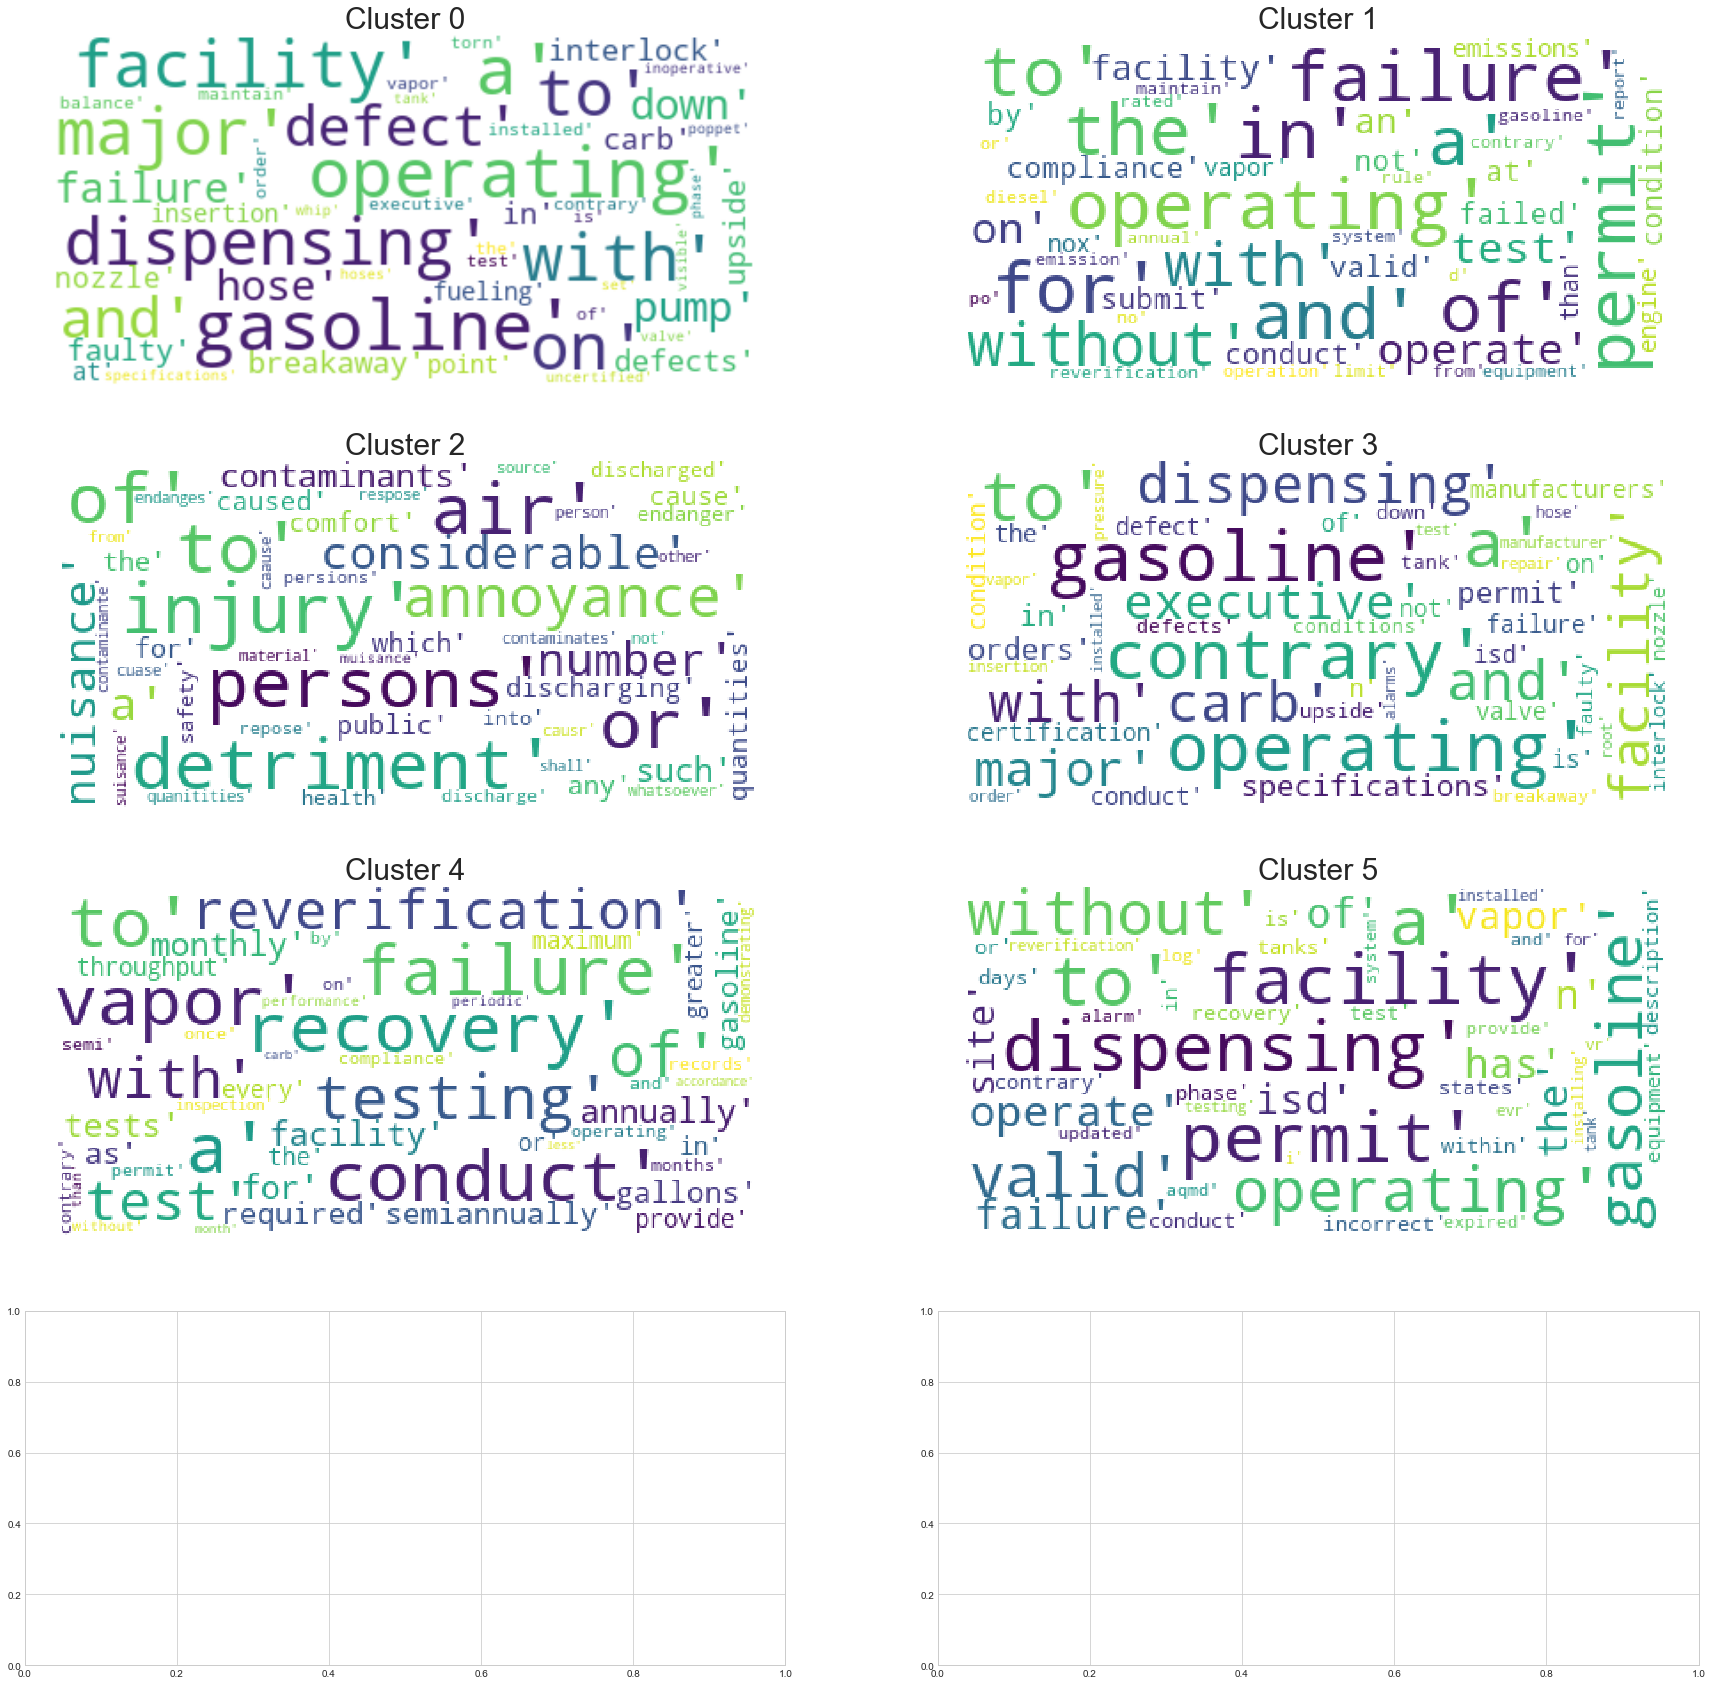

In [170]:
fig, axes = plt.subplots(4, 2, figsize=(30, 30))

ax = axes[0, 0]
ax.imshow(create_wordcloud(group_zero), interpolation="bilinear")
ax.axis('off')
ax.set_title("Cluster 0", fontsize=30)

ax = axes[0, 1]
ax.imshow(create_wordcloud(group_one))
ax.axis('off')
ax.set_title("Cluster 1", fontsize=30)

ax = axes[1, 0]
ax.imshow(create_wordcloud(group_two))
ax.axis('off')
ax.set_title("Cluster 2", fontsize=30)

ax = axes[1, 1]
ax.imshow(create_wordcloud(group_three))
ax.axis('off')
ax.set_title("Cluster 3", fontsize=30)

ax = axes[2, 0]
ax.imshow(create_wordcloud(group_four))
ax.axis('off')
ax.set_title("Cluster 4", fontsize=30)

ax = axes[2, 1]
ax.imshow(create_wordcloud(group_five))
ax.axis('off')
ax.set_title("Cluster 5", fontsize=30)
plt.show()

ax = axes[3, 0]
ax.imshow(create_wordcloud(group_six))
ax.axis('off')
ax.set_title("Cluster 6", fontsize=30)
plt.show()

In [95]:
df_cross_tab = kmeans_df.iloc[:, 1:4]
cross_tab_summary = pd.crosstab(df_cross_tab['facility_type'], df_cross_tab['Cluster'])
cross_tab_summary 

Cluster,0,1,2,3,4,5,6
facility_type,,,,,,,
n,147,2143,11,110,95,1,45
r,0,113,2,1,0,26,0
rt,0,262,0,1,0,19,0
t,0,208,152,0,0,0,0


In [96]:
start = time.time()

model = TSNE(learning_rate=100, perplexity=50)
transformed = model.fit_transform(X_dtm.toarray())

end = time.time()
print('Elapsed time: ', end - start, 'seconds')

Elapsed time:  107.89638781547546 seconds


In [106]:
tsne_df = pd.DataFrame(transformed, columns=['x', 'y'])
tsne_df['violation_text'] = kmeans_df['violation_text']
tsne_df['facility_type'] = kmeans_df['facility_type']
tsne_df['Total_Settlement'] = kmeans_df['Total_Settlement'] 
tsne_df['Cluster'] = labels

In [107]:
tsne_df.head()

,x,y,violation_text,facility_type,Total_Settlement,Cluster
0,18.827591,-26.891197,failed to reconcile quarterly nox emissions in...,rt,7200.00,5
1,6.034492,-1.172195,inaccurate qcers inaccurate apep,rt,7200.00,1
2,5.973649,-2.062412,failure to keep the roof of internal floating ...,t,3500.00,1
3,6.071810,-1.671913,failure to operate and maintain a continuous m...,t,3500.00,1
4,6.402952,-2.148327,selling architectural coatings within the scaq...,n,9438.66,1


In [108]:
tsne_df.shape

(3336, 6)

In [109]:
tsne_df['violation_text'].isnull().sum()

303

In [110]:
tsne_df = tsne_df.dropna(axis=0, how='any')

In [111]:
tsne_df.shape

(3033, 6)

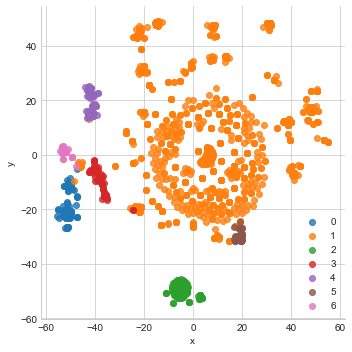

In [112]:
plt.figure(figsize=(20,10))
sns.lmplot( x="x", y="y", data=tsne_df, fit_reg=False, hue='Cluster', legend=False)
plt.legend(loc='lower right')
plt.show()

In [160]:
tsne_df[tsne_df['Cluster'] == 6].head()

,x,y,violation_text,facility_type,Total_Settlement,Cluster
231,-52.715118,2.103909,operating a gasoline dispensing facility with ...,n,300.0,6
313,-52.714493,2.106007,operating above site with uncertified fuel whi...,n,550.0,6
368,-52.954792,-1.528291,operating deep fryers and electrostatic precip...,n,4500.0,6
371,-52.714493,2.106007,failure to conduct reverification tests in a t...,n,600.0,6
484,-52.714668,2.105889,exceeded provided character space please view ...,t,425000.0,6


In [161]:
tsne_df[tsne_df['Cluster'] == 5].head()

,x,y,violation_text,facility_type,Total_Settlement,Cluster
0,18.827591,-26.891197,failed to reconcile quarterly nox emissions in...,rt,7200.0,5
82,19.145494,-29.365475,failure to demonstrate compliance with nox emi...,n,100.0,5
112,19.510490,-31.437780,operating a gasoline dispensing facility cont...,n,6500.0,5
259,19.848278,-26.990942,failure to maintain components according to ma...,n,900.0,5
261,19.145494,-29.365475,operating a gasoline dispensing facility with ...,n,715.0,5


In [165]:
tsne_df[tsne_df['Cluster'] == 4].head(10)

,x,y,violation_text,facility_type,Total_Settlement,Cluster
49,-41.250496,15.106239,failure to use sufficient bacm on site during ...,n,1700.0,4
69,-42.905762,24.285151,operating device c contrary to permit conditio...,rt,1000.0,4
135,-41.508831,21.762884,operation of a acre site in a manner that gene...,n,2200.0,4
156,-42.905762,24.285151,air pollution control system po f continuing t...,n,1000.0,4
163,-41.391323,21.103474,failure to comply with title v permit condition,t,750.0,4
206,-41.698669,24.447855,failure to conduct subsequent reverification t...,n,1125.0,4
224,-41.698189,24.447790,dust remianing visible in the atmosphere beyon...,n,4500.0,4
229,-42.498016,23.872162,failure to repairreplace vapor recovery compon...,n,1000.0,4
234,-42.714977,24.891493,operation of dieselfueled engine without a val...,n,560.0,4
279,-42.498016,23.872162,failed to reconcile quarterly nox emissions in...,r,32500.0,4


In [169]:
tsne_df[tsne_df['Cluster'] == 2].head(20)

,x,y,violation_text,facility_type,Total_Settlement,Cluster
63,-1.589628,-54.010925,operating soil vapor extraction equip contrary...,n,72500.0,2
319,2.603338,-52.839016,failure to conduct andor provide proof of cond...,n,100.0,2
320,2.630622,-53.011780,failed to demonstrate compliance with the emis...,n,425.0,2
667,-2.762705,-48.313793,operating a gasoline dispensing equipment with...,n,250.0,2
668,-6.258578,-50.470009,facility operating a quantum blast pulse jet b...,n,800.0,2
669,-2.450972,-47.467793,facility operating a quantum blast pulse jet b...,n,800.0,2
959,-4.690349,-49.960876,operating a gasoline dispensing facility with ...,n,400.0,2
960,-7.186135,-51.956551,failure to accurately report r emissions,rt,1000.0,2
961,-5.078145,-45.710945,failure to conduct an asbestos survey failure ...,n,1000.0,2
962,-4.138476,-49.742474,failure to conduct an asbestos survey failure ...,n,1000.0,2


In [113]:
def tsne_run(lr, perp):
    start = time.time()

    X = df_all['violation_data']
    y = df_all['facility_type']

    min_df = 0.01
    max_df = 0.90

    vect = CountVectorizer(stop_words='english', min_df=min_df, max_df=max_df, ngram_range=(3,4))
    X_dtm = vect.fit_transform(X)

    kmeans = KMeans(n_clusters=6, random_state=10)
    kmeans.fit(X_dtm)
    labels = kmeans.predict(X_dtm)
    
    kmeans_df = pd.DataFrame()
    kmeans_df['violation_text'] = df_all['trim_violation_text']
    kmeans_df['facility_type'] = df_all['facility_type']
    kmeans_df['Total_Settlement'] = df_all['Total']
    kmeans_df['Cluster'] = labels

    model = TSNE(learning_rate=lr, perplexity=perp)
    transformed = model.fit_transform(X_dtm.toarray())

    tsne_df = pd.DataFrame(transformed, columns=['x', 'y'])
    tsne_df['violation_text'] = kmeans_df['violation_text']
    tsne_df['facility_type'] = kmeans_df['facility_type']
    tsne_df['Total_Settlement'] = kmeans_df['Total_Settlement'] 
    tsne_df['Cluster'] = labels

    plt.figure(figsize=(20,10))
    sns.lmplot( x="x", y="y", data=tsne_df, fit_reg=False, hue='Cluster', legend=False)
    plt.legend(loc='lower right')
    plt.show()

    end = time.time()
    print('Elapsed time: ', end - start, 'seconds')

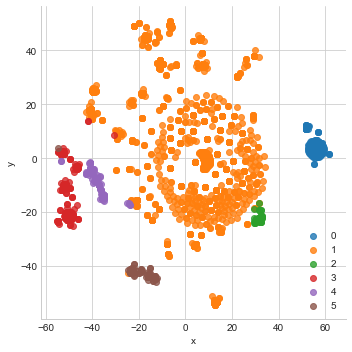

Elapsed time:  111.43008399009705 seconds


In [114]:
tsne_run(90, 50)

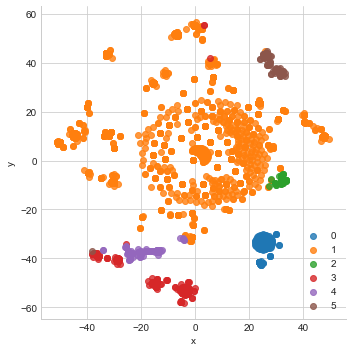

Elapsed time:  125.84020376205444 seconds


In [115]:
tsne_run(100, 50)

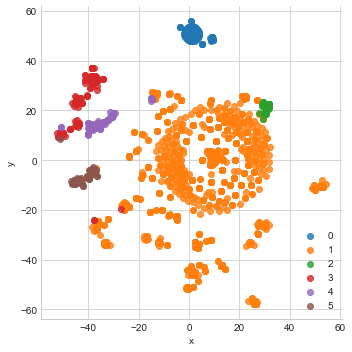

Elapsed time:  131.08443593978882 seconds


In [116]:
tsne_run(150, 50)

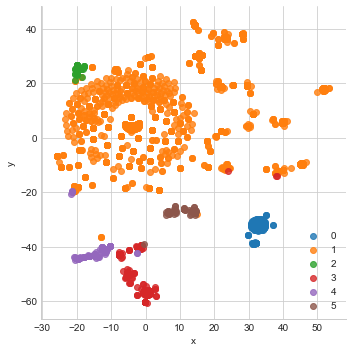

Elapsed time:  138.1765332221985 seconds


In [117]:
tsne_run(200, 50)

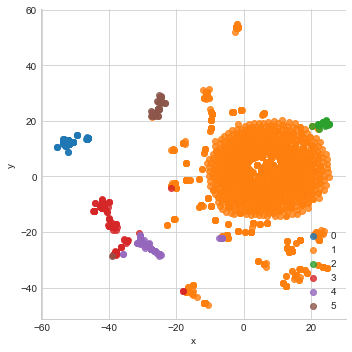

Elapsed time:  138.55078983306885 seconds


In [118]:
tsne_run(250, 50)

In [577]:
#https://stackoverflow.com/questions/24647400/what-is-the-best-stemming-method-in-python
#https://pythonprogramming.net/stemming-nltk-tutorial/

In [132]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [133]:
lmtzr = WordNetLemmatizer()
ps = PorterStemmer()

In [134]:
a = 'failure to operate and maintain a continuous monitoring system cms according to rule plan'
a_list = a.split(' ')
list_= [lmtzr.lemmatize(each) for each in a_list]
b = ' '.join(list_)
a_list = b.split(' ')
list_= [ps.stem(each) for each in a_list]
a = ' '.join(list_)

In [135]:
a

'failur to oper and maintain a continu monitor system cm accord to rule plan'

In [136]:
b

'failure to operate and maintain a continuous monitoring system cm according to rule plan'